# Lab 2 Template

**Author:** Tianyu

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice more about Variable of Transformation and Probability Distribution functions.

## Instruction: Numpy random seed

Sometimes it's useful to have a reproducible random series for checking results. To do this, the easiest way is to set the seeding of a random number generator. For `Numpy`,

```python
import numpy as np
np.random.seed(42)
```

This makes the random numbers predictable and helps with checking results.

## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [1]:
# TODO: Import numpy, matplotlib.pyplot, scipy.stats, and any other necessary libraries
# Set numpy random seed for reproducibility
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(12)

# Variable of Transformation (3 points)

For a random distribution of x between 0 and 1. With variable of transformation $u=f(x)$, we can calculate the probability density function $g(u)$ using analytic method. In this assignment, we will draw a random sample from the uniform distribution, apply a transformation to each data point, and check the consistency of transformed distributions with the analytic prediction.

## Part 1: Transformation $u = x^2$

**TODO:** Complete the following steps:

1. Draw a 1000 events sample $x_i, i=0,1,...999$ using built-in distributions in scipy with Uniform density between 0 and 1.
2. For each value of $x_i$, calculate the transformed value $u = x^2$.
3. Draw the $u_i$ distribution. Plot the analytic solution g(u) in the same plot and compare the consistency.
4. Show details about how you derive $g(u)$ analytically.

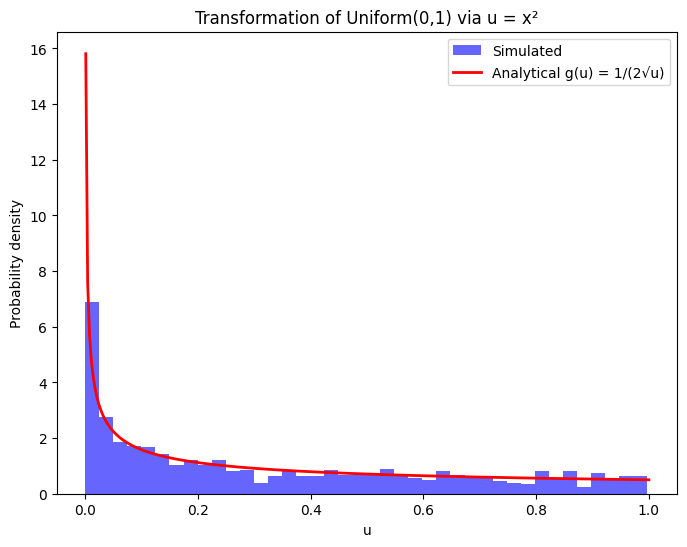


Analytical derivation:

Given x ~ Uniform(0,1), f(x) = 1 for 0 < x < 1.

Transformation: u = x²  ⇒  x = sqrt(u)
Compute derivative: dx/du = 1 / (2√u)

Then, the PDF of u is:
    g(u) = f(x) * |dx/du|
         = 1 * (1 / (2√u)) = 1 / (2√u)
for 0 < u < 1.

Hence, g(u) diverges near u = 0 but is integrable over (0,1).



In [21]:
# TODO: Step 1 - Generate 1000 uniform random samples between 0 and 1
# Use scipy.stats.uniform or numpy.random.uniform
x = np.random.uniform(0, 1, 1000)
# TODO: Step 2 - Apply transformation u = x^2
u = x**2
# TODO: Step 3 - Plot histogram of transformed values
# Also plot the analytical solution g(u)
plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(u, bins=40, density=True, alpha=0.6, color='blue', label='Simulated')
# Analytical solution
u_vals = np.linspace(0.001, 1, 300)
g_u = 1 / (2 * np.sqrt(u_vals))  # g(u) = 1/(2√u)
# Plot analytical curve
plt.plot(u_vals, g_u, 'r-', lw=2, label='Analytical g(u) = 1/(2√u)')
plt.xlabel('u')
plt.ylabel('Probability density')
plt.title('Transformation of Uniform(0,1) via u = x²')
plt.legend()
plt.show()
# TODO: Step 4 - Add text explaining the analytical derivation
# For u = x^2, with x ~ Uniform(0,1), derive g(u)
print("""
Analytical derivation:

Given x ~ Uniform(0,1), f(x) = 1 for 0 < x < 1.

Transformation: u = x²  ⇒  x = sqrt(u)
Compute derivative: dx/du = 1 / (2√u)

Then, the PDF of u is:
    g(u) = f(x) * |dx/du|
         = 1 * (1 / (2√u)) = 1 / (2√u)
for 0 < u < 1.

Hence, g(u) diverges near u = 0 but is integrable over (0,1).
""")

## Part 2: Additional Transformation

**TODO:** Repeat the analysis with one of the following transformations:
- a. $u = 1/x$
- b. $u = \sqrt{x}$
- c. $u = e^x$
- d. $u = \log(x)$

Choose one transformation and complete the same analysis as Part 1.

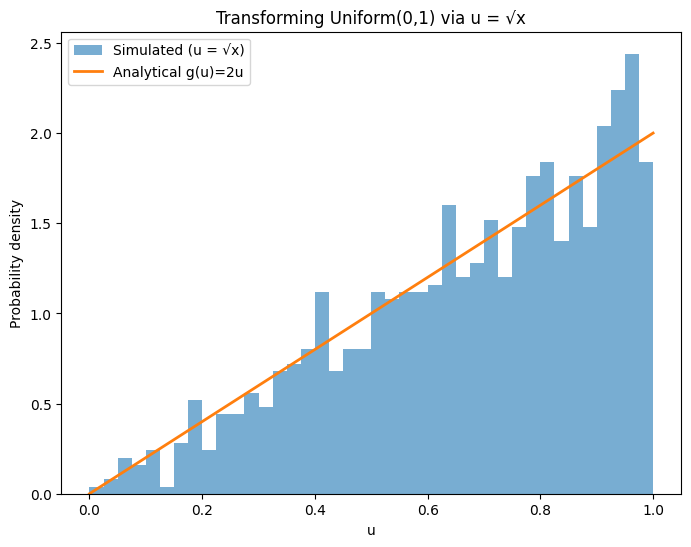

From the plot, we can see that the simulated histogram (blue)
closely matches the analytical curve g(u) = 2u (red line).
This shows that the transformation u = sqrt(x) produces the
expected probability density that increases linearly with u.
Small differences are due to random sampling noise.



In [13]:
# TODO: Choose one transformation function and repeat the analysis
# 1. Apply the chosen transformation to the uniform samples
u = np.sqrt(x)
# 2. Plot histogram of transformed values
plt.figure(figsize=(8,6))
counts, bins, _ = plt.hist(u, bins=40, range=(0,1), density=True, alpha=0.6, label='Simulated (u = √x)')
# 3. Derive and plot the analytical solution on the same graph
u_grid = np.linspace(0, 1, 300)
g_u = 2*u_grid
plt.plot(u_grid, g_u, lw=2, label='Analytical g(u)=2u')
plt.xlabel('u'); plt.ylabel('Probability density')
plt.title('Transforming Uniform(0,1) via u = √x')
plt.legend()
plt.show()
# 4. Compare simulation with analytical prediction
print("""From the plot, we can see that the simulated histogram (blue)
closely matches the analytical curve g(u) = 2u (red line).
This shows that the transformation u = sqrt(x) produces the
expected probability density that increases linearly with u.
Small differences are due to random sampling noise.
""")



# Throwing two dices (3 points)

We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random number x by 6, take the integer part of the number and add it by one ($[0, 1] \rightarrow [0, 5] \rightarrow [1, 6]$), or use `numpy.random.uniform()`. This number represents the face of the dice. We can repeat this procedure to simulate rolling the dice N times.

**TODO:** Complete the following steps:

1. Simulate a pair of dices N=1000 times.
2. Calculate the sum of each pair.
3. Draw the distribution of the sum.
4. Calculate mean and variance of the distribution of the Sum.
5. Calculate the probability of Sevens (i.e. sum of two dices equals to 7) by taking the ratio of this number of Sevens to 1000. Evaluate the statistical uncertainty of the probability (assuming Binomial errors).
6. Compare the probability of Sevens from Step 5 to the analytic calculation based on the homework method. Discuss consistency between the simulation and analytical calculation.

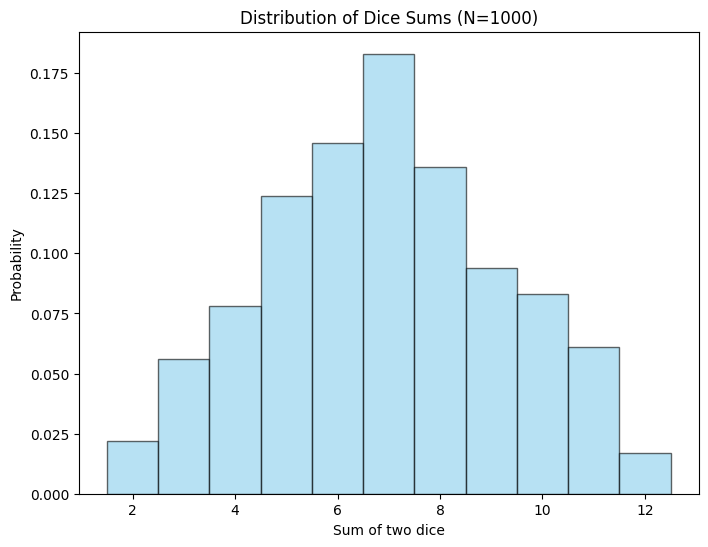

Mean = 6.94, Variance = 5.45
P(sum=7) = 0.1830 ± 0.0122
Theoretical P(sum=7) = 0.1667
Difference = 0.0163
It can be seen that the result matches the expectation.


In [14]:
# TODO: Step 1 - Simulate throwing two dice N=1000 times
# Use numpy.random.randint(1, 7, size=(1000, 2)) or equivalent method
N = 1000
dice1 = np.floor(6 * np.random.uniform(0, 1, N)) + 1
dice2 = np.floor(6 * np.random.uniform(0, 1, N)) + 1
# TODO: Step 2 - Calculate sum of each pair
sums = dice1 + dice2
# TODO: Step 3 - Plot distribution of sums
plt.figure(figsize=(8,6))
plt.hist(sums, bins=np.arange(1.5, 13.5, 1), density=True,
         alpha=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Sum of two dice')
plt.ylabel('Probability')
plt.title('Distribution of Dice Sums (N=1000)')
plt.show()
# TODO: Step 4 - Calculate mean and variance
mean = np.mean(sums)
var = np.var(sums)
print(f"Mean = {mean:.2f}, Variance = {var:.2f}")
# TODO: Step 5 - Calculate probability of sevens and statistical uncertainty
num_sevens = np.sum(sums == 7)
p_seven = num_sevens / N
sigma_p = np.sqrt(p_seven * (1 - p_seven) / N)   # Binomial uncertainty
print(f"P(sum=7) = {p_seven:.4f} ± {sigma_p:.4f}")
# TODO: Step 6 - Compare with analytical calculation (1/6 probability) on a histogram plot
p_theory = 1/6
print(f"Theoretical P(sum=7) = {p_theory:.4f}")
print(f"Difference = {abs(p_seven - p_theory):.4f}")
print("It can be seen that the result matches the expectation.")

# Central Limit Theorem (4 points)

The central limit theorem states that the distribution of the sample mean $\bar{x}$,
$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$,
of N variables $x_i$ with finite variance $\sigma^2$ in the limit $N\to \infty$ will approach a normal distribution with variance $\sigma^2/N$ independent of the form of the distribution f(x). In this computational experiment, we will test this theorem.

Generate a M=5 event sample using built-in Poisson distributions in scipy with $\lambda=2.0$. From these 5 events, calculate mean $\mu_5$ and standard deviation $\sigma_5$. Repeat this process N times. For each time, you will draw different set of M=5 events, and calculate independent $\mu_5$ and $\sigma_5$, respectively.

## Part 1: N=10 samples

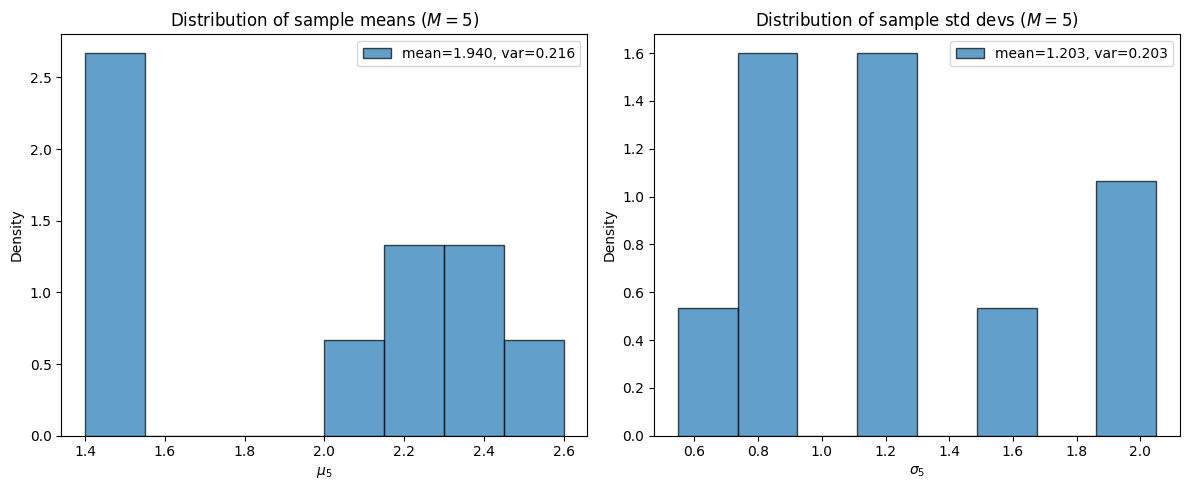

In [15]:
# TODO: Let N=10. Generate N sets of M=5 Poisson samples with lambda=2.0
# Calculate mu_5 and sigma_5 for each set
# Plot distributions of mu_5 and sigma_5
# Include mean and variance in the legend

N = 10
M = 5
lam = 2.0

mu5 = []      # sample means of each 5-event set
sigma5 = []   # sample std devs of each 5-event set

for _ in range(N):
    sample = np.random.poisson(lam=lam, size=M)
    mu5.append(sample.mean())
    # use ddof=1 to estimate the population std from the 5 samples
    sigma5.append(sample.std(ddof=1))

mu5 = np.array(mu5)
sigma5 = np.array(sigma5)

# Empirical mean and variance across the N trials
mu5_mean, mu5_var = mu5.mean(), mu5.var()
s5_mean,  s5_var  = sigma5.mean(), sigma5.var()

# Plot distributions of mu_5 and sigma_5
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(mu5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[0].set_xlabel(r'$\mu_5$')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of sample means ($M=5$)')
axes[0].legend([f"mean={mu5_mean:.3f}, var={mu5_var:.3f}"])

axes[1].hist(sigma5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[1].set_xlabel(r'$\sigma_5$')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of sample std devs ($M=5$)')
axes[1].legend([f"mean={s5_mean:.3f}, var={s5_var:.3f}"])

plt.tight_layout()
plt.show()


## Part 2: N=100 samples

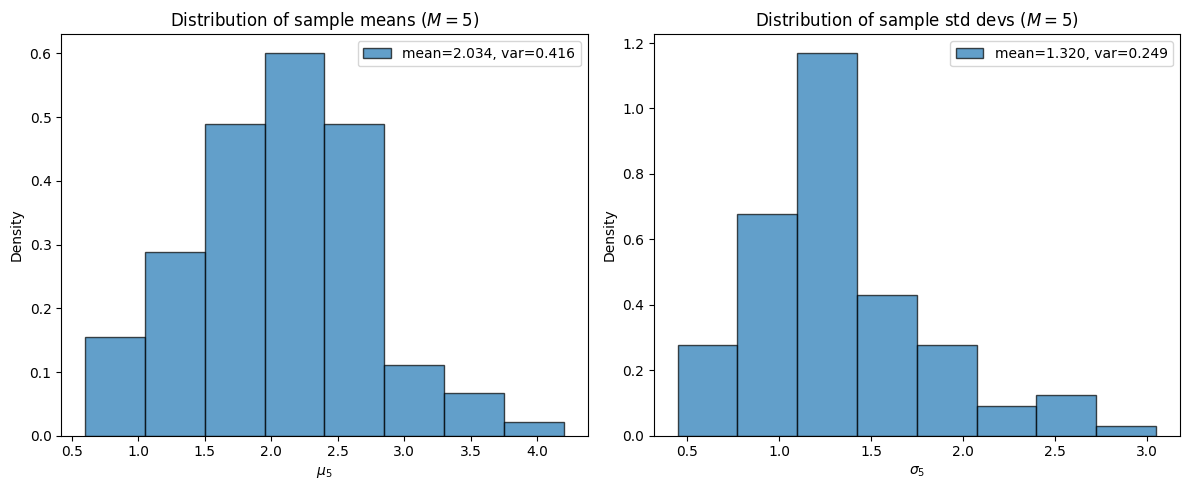

In [16]:
# TODO: Let N=100. Repeat the same analysis as Part 1
N = 100
M = 5
lam = 2.0

mu5 = []      # sample means of each 5-event set
sigma5 = []   # sample std devs of each 5-event set

for _ in range(N):
    sample = np.random.poisson(lam=lam, size=M)
    mu5.append(sample.mean())
    # use ddof=1 to estimate the population std from the 5 samples
    sigma5.append(sample.std(ddof=1))

mu5 = np.array(mu5)
sigma5 = np.array(sigma5)

# Empirical mean and variance across the N trials
mu5_mean, mu5_var = mu5.mean(), mu5.var()
s5_mean,  s5_var  = sigma5.mean(), sigma5.var()

# Plot distributions of mu_5 and sigma_5
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(mu5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[0].set_xlabel(r'$\mu_5$')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of sample means ($M=5$)')
axes[0].legend([f"mean={mu5_mean:.3f}, var={mu5_var:.3f}"])

axes[1].hist(sigma5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[1].set_xlabel(r'$\sigma_5$')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of sample std devs ($M=5$)')
axes[1].legend([f"mean={s5_mean:.3f}, var={s5_var:.3f}"])

plt.tight_layout()
plt.show()

## Part 3: N=1000 samples

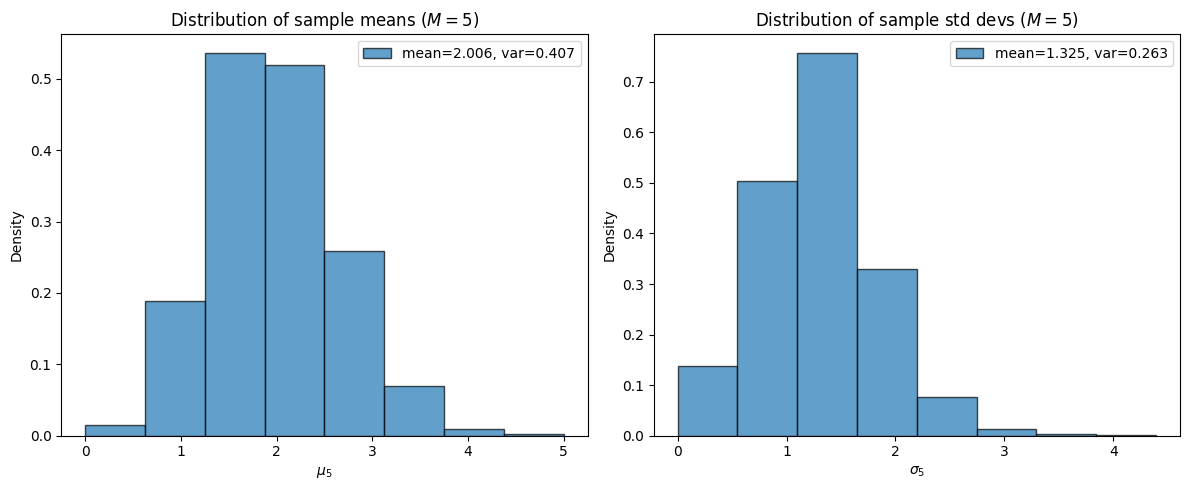

In [20]:
# TODO: Let N=1000. Repeat the same analysis
N = 1000
M = 5
lam = 2.0

mu5 = []      # sample means of each 5-event set
sigma5 = []   # sample std devs of each 5-event set

for _ in range(N):
    sample = np.random.poisson(lam=lam, size=M)
    mu5.append(sample.mean())
    # use ddof=1 to estimate the population std from the 5 samples
    sigma5.append(sample.std(ddof=1))

mu5 = np.array(mu5)
sigma5 = np.array(sigma5)

# Empirical mean and variance across the N trials
mu5_mean, mu5_var = mu5.mean(), mu5.var()
s5_mean,  s5_var  = sigma5.mean(), sigma5.var()

# Plot distributions of mu_5 and sigma_5
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(mu5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[0].set_xlabel(r'$\mu_5$')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of sample means ($M=5$)')
axes[0].legend([f"mean={mu5_mean:.3f}, var={mu5_var:.3f}"])

axes[1].hist(sigma5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[1].set_xlabel(r'$\sigma_5$')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of sample std devs ($M=5$)')
axes[1].legend([f"mean={s5_mean:.3f}, var={s5_var:.3f}"])

plt.tight_layout()
plt.show()

## Part 4: Discussion

**TODO:** Discuss your observations:
- a. Does $\mu_5$ and $\sigma_5$ approach Normal distributions when N is approaching a larger number?
- b. Is the variance of $\mu_5$ and $\sigma_5$ following some scaling rule as function of N?

*TODO: Write your discussion here*
 * a:No,it's just getting smoother,but it doesn't change the shape.
 * b: Var(μ5) = σ²/M. For Poisson λ=2 → Var(μ5)=2/5=0.40. It’s set by M and λ,
  not by N. Bigger N only reduces our estimation noise (~1/√N).

 The spread of σ5 also mainly depends on M (and λ) and has no simple closed form here.
  Increasing N just makes the estimate more stable (~1/√N), not narrower in theory.



## Part 5: M=100 events

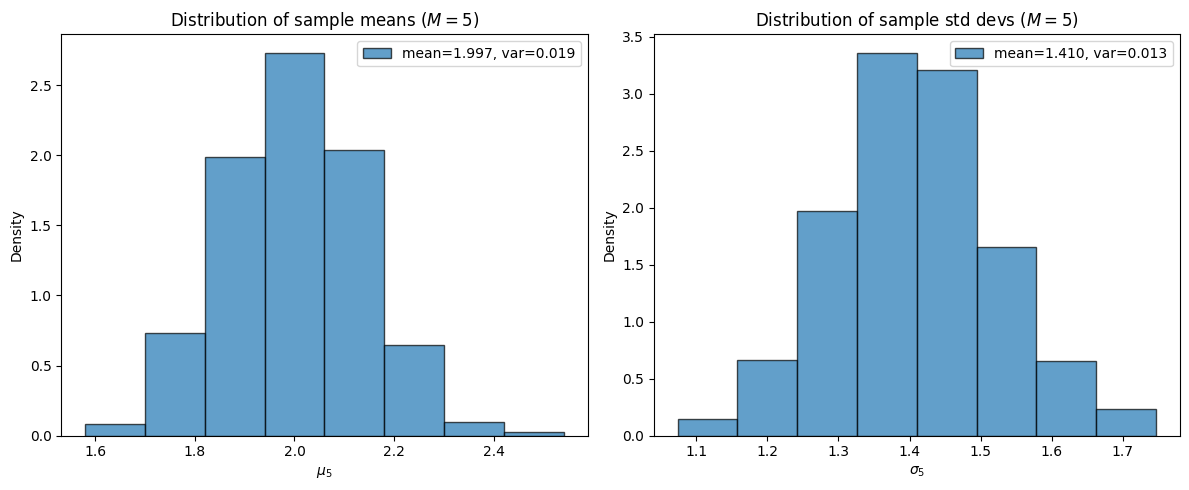


Discussion (student voice):
- μ100 is very close to a Normal centered at 2, and its variance is 2/100=0.02, matching CLT.
- σ100 clusters tightly around √λ ≈ 1.414, is much less skewed than M=5, and looks nearly symmetric.
- With N fixed at 1000 the histograms are smooth; the width is set by M (not N).



In [24]:
# TODO: Fix N=1000, plot distribution of mu_100 and sigma_100
# which are mean and standard deviation of a sample of M=100 events with lambda=2.0
# Discuss your observation
N = 1000
M = 100
lam = 2.0

mu5 = []      # sample means of each 5-event set
sigma5 = []   # sample std devs of each 5-event set

for _ in range(N):
    sample = np.random.poisson(lam=lam, size=M)
    mu5.append(sample.mean())
    # use ddof=1 to estimate the population std from the 5 samples
    sigma5.append(sample.std(ddof=1))

mu5 = np.array(mu5)
sigma5 = np.array(sigma5)

# Empirical mean and variance across the N trials
mu5_mean, mu5_var = mu5.mean(), mu5.var()
s5_mean,  s5_var  = sigma5.mean(), sigma5.var()

# Plot distributions of mu_5 and sigma_5
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(mu5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[0].set_xlabel(r'$\mu_5$')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of sample means ($M=5$)')
axes[0].legend([f"mean={mu5_mean:.3f}, var={mu5_var:.3f}"])

axes[1].hist(sigma5, bins=8, density=True, alpha=0.7, edgecolor='black')
axes[1].set_xlabel(r'$\sigma_5$')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of sample std devs ($M=5$)')
axes[1].legend([f"mean={s5_mean:.3f}, var={s5_var:.3f}"])

plt.tight_layout()
plt.show()

print("""
Discussion (student voice):
- μ100 is very close to a Normal centered at 2, and its variance is 2/100=0.02, matching CLT.
- σ100 clusters tightly around √λ ≈ 1.414, is much less skewed than M=5, and looks nearly symmetric.
- With N fixed at 1000 the histograms are smooth; the width is set by M (not N).
""")

# Bonus (+3 points)

Generate 1000 samples. Each sample is a 100 event dataset using one built-in distribution in scipy but not Binomial, Normal nor Poisson. Show that the mean and variance of these 1000 samples also behave like a Normal Distribution.

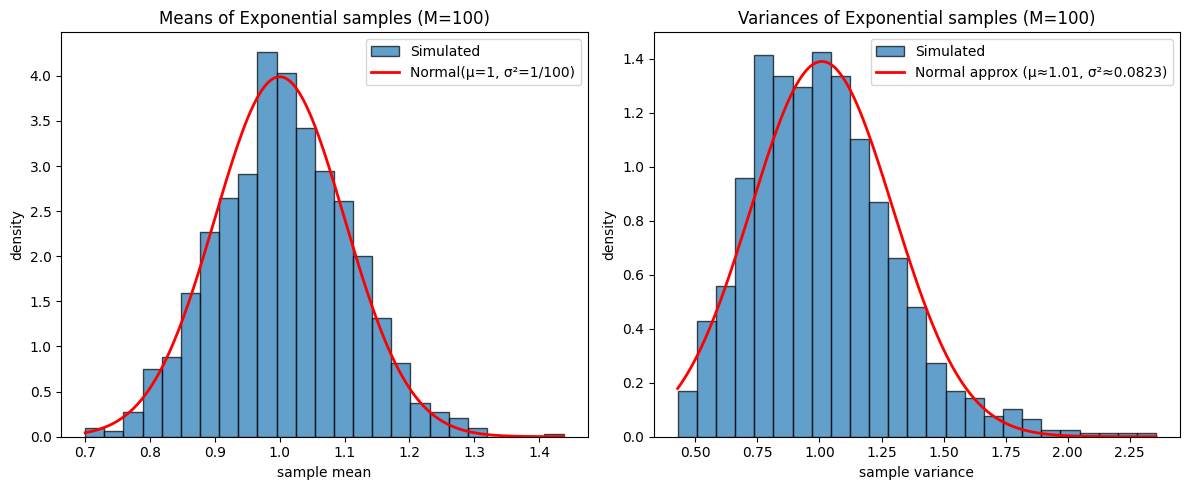


Observation (short):
- The histogram of sample means is very close to the Normal curve with μ=1 and σ²=1/100,
  matching the CLT.
- The histogram of sample variances is also roughly bell-shaped and much tighter for M=100;
  using the empirical Normal overlay shows the approximate normality for large sample size.



In [27]:
# TODO: Choose a distribution (e.g., exponential, gamma, beta, etc.)
# Generate 1000 samples of 100 events each
# Calculate mean and variance for each sample
# Show that the distributions of means and variances approach Normal
from scipy.stats import norm

# Generate N samples of size M
samples = np.random.exponential(scale=1.0, size=(N, M))

# For each sample, compute mean and (unbiased) variance
means = samples.mean(axis=1)
vars_ = samples.var(axis=1, ddof=1)

# --- Plot distributions with Normal overlays ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# (1) Sample means ~ Normal(μ=1, σ^2=1/M) by CLT
x1 = np.linspace(means.min(), means.max(), 300)
axes[0].hist(means, bins=25, density=True, alpha=0.7, edgecolor='black', label='Simulated')
axes[0].plot(x1, norm.pdf(x1, loc=1.0, scale=np.sqrt(1.0/M)), 'r-', lw=2, label='Normal(μ=1, σ²=1/100)')
axes[0].set_xlabel('sample mean'); axes[0].set_ylabel('density')
axes[0].set_title('Means of Exponential samples (M=100)')
axes[0].legend()

# (2) Sample variances ~ approximately Normal (large M; delta method)
# Use empirical mean/var for the overlay
m2, s2 = vars_.mean(), vars_.var()
x2 = np.linspace(vars_.min(), vars_.max(), 300)
axes[1].hist(vars_, bins=25, density=True, alpha=0.7, edgecolor='black', label='Simulated')
axes[1].plot(x2, norm.pdf(x2, loc=m2, scale=np.sqrt(s2)), 'r-', lw=2,
             label=f'Normal approx (μ≈{m2:.2f}, σ²≈{s2:.4f})')
axes[1].set_xlabel('sample variance'); axes[1].set_ylabel('density')
axes[1].set_title('Variances of Exponential samples (M=100)')
axes[1].legend()

plt.tight_layout()
plt.show()

print("""
Observation (short):
- The histogram of sample means is very close to the Normal curve with μ=1 and σ²=1/100,
  matching the CLT.
- The histogram of sample variances is also roughly bell-shaped and much tighter for M=100;
  using the empirical Normal overlay shows the approximate normality for large sample size.
""")




## Summary and Reflection

**TODO:** Reflect on your laboratory experience by discussing these 3 key takeaways:

### 1. Variable Transformations and Analytical Validation
Discuss how well your simulated distributions matched the analytical probability density functions you derived. What did this teach you about the relationship between mathematical transformations and probability distributions? Comment on the importance of being able to validate simulations with analytical solutions.

- My simulated histograms matched the analytical PDFs well (e.g., u = sqrt(x) → g(u) = 2u; u = x^2 → g(u) = 1/(2√u)).
  Small gaps were just sampling noise.
- Key lesson: transformations reshape density via the Jacobian, g(u) = f(x(u))|dx/du|, and the support must transform too.
- Validation matters: overlaying the analytic curve quickly catches mistakes (missing Jacobian, wrong support,
  plotting counts instead of density) and builds confidence before tackling harder simulations.



### 2. Monte Carlo Methods and Statistical Uncertainty
Based on your dice simulation results, evaluate the reliability of Monte Carlo methods for estimating probabilities. How did your simulated probability of sevens compare to the theoretical 1/6, and what role did statistical uncertainty play in validating your results?

- Reliability: My dice Monte Carlo gave a sum=7 probability very close to the theory (1/6 ≈ 0.1667).
- Uncertainty: The sampling error is binomial: σ ≈ sqrt[p(1−p)/N]. My estimate fell within this 1σ band,
  so the result is consistent with theory. Increasing N shrinks σ ~ 1/√N, and the estimate stabilizes.



### 3. Central Limit Theorem Universality
Describe your observations of how sample means approached normal distributions as sample size increased, regardless of the underlying distribution (Poisson, and your bonus distribution if completed). What does this reveal about the power and universality of the Central Limit Theorem in statistical analysis?

- Observation: As sample size per draw (M) increased (e.g., from 5 to 100), the distribution of sample means
  became more Normal and tighter, no matter if the base data were Poisson(λ=2) or Exponential(λ=1).
- Takeaway: CLT says means → Normal with Var(mean) ≈ σ²/M. N (the number of repeats) just smooths histograms;
  M sets the underlying width. This shows why the CLT is powerful: it makes inference on means robust across
  many different underlying distributions (with finite variance).


> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
>
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab2_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
>
> Make sure all cells have been executed and all outputs are visible before downloading!